<a href="https://colab.research.google.com/github/thompf2/Machine-Learning-Engineering/blob/main/MLE_Homework5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROBLEM #1:


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 94s 117ms/step - accuracy: 0.3140 - loss: 1.8451 - val_accuracy: 0.4840 - val_loss: 1.4124
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 142s 117ms/step - accuracy: 0.5039 - loss: 1.3640 - val_accuracy: 0.5548 - val_loss: 1.2293
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 139s 114ms/step - accuracy: 0.5738 - loss: 1.1998 - val_accuracy: 0.5443 - val_loss: 1.2794
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 142s 114ms/step - accuracy: 0.6090 - loss: 1.1061 - val_accuracy: 0.6224 - val_loss: 1.0800
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 146s 120ms/step - accuracy: 0.6362 - loss: 1.0235 - val_accuracy: 0.6372 - val_loss: 1.0334
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 137s 113ms/step - accuracy: 0.6532 - loss: 0.9756 - val_accuracy: 0.6524 - val_loss: 0.9950
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 89s 114ms/step - accuracy: 0.6746 - loss: 0.9268 - val_accuracy: 0.6386 - val_loss: 1.0212
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 141s 113ms/step - accuracy: 0.6876 - l

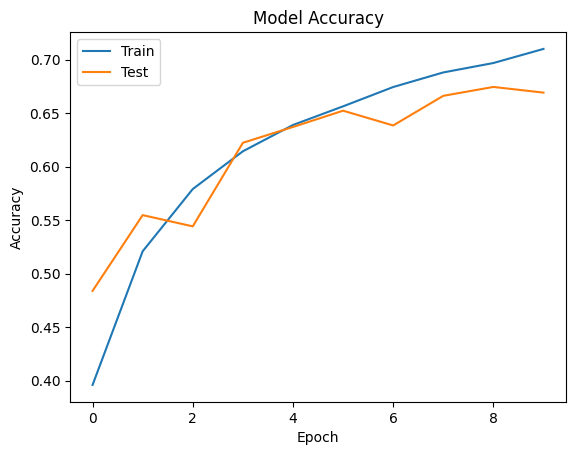

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build CNN Model
model = models.Sequential([
    layers.Conv2D(filters=64, kernel_size=(5,5), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)


plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


PROBLEM #2:


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.svm import SVC

# load dataset
breastcancer = load_breast_cancer()
X = breastcancer.data
y = breastcancer.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, train_size=0.70, random_state=123, stratify=y)

# define the features needed
selected_feature_names = ['worst compactness', 'worst concavity', 'worst area']

# get indices from the dataset
selected_features = [list(breastcancer.feature_names).index(name) for name in selected_feature_names]

# train with only the selected features
X_train_selected = X_train[:, selected_features]
X_test_selected = X_test[:, selected_features]

# fit model and predict
svm = SVC(kernel='linear')
svm.fit(X_train_selected, y_train)
y_pred = svm.predict(X_test_selected)

# classification metrics
print("Accuracy with Linear Kernel:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# create an SVM model with RBF kernel
svm_model = SVC(kernel='rbf', C = 2)
svm_model.fit(X_train_selected, y_train)
y_pred = svm_model.predict(X_test_selected)

# classification metrics
print("Accuracy with RBF Kernel (C=2):", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy with Linear Kernel: 0.9590643274853801
Precision: 0.9716981132075472
Recall: 0.9626168224299065
F1 Score: 0.9671361502347418

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95        64
           1       0.97      0.96      0.97       107

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

Accuracy with RBF Kernel (C=2): 0.935672514619883
Precision: 0.9137931034482759
Recall: 0.9906542056074766
F1 Score: 0.9506726457399103

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.84      0.91        64
           1       0.91      0.99      0.95       107

    accuracy                           0.94       171
   macro avg       0.95      0.92      0.93       171
weighted avg       0.94      0.94      0.93       171

